# Convolutional Neural Network (CNN)

In [1]:
# How to read cells code from a Notebook
# import nbformat
# # Replace with your actual file path
# file_path = "C:\\Users\\ARSAMANT\\Downloads\\CNN (Dog & Cat)"
# # Load the notebook
# with open(file_path, 'r', encoding='utf-8') as f:
#     notebook = nbformat.read(f, as_version=4)
# # Display all cells
# for i, cell in enumerate(notebook.cells):
#     print(f"\n--- Cell {i+1} ({cell.cell_type}) ---")
#     print(cell.source)

In [2]:
# !pip install tensorboard

In [3]:
# !pip install opencv-python

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import *

import tensorflow as tf

import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, classification_report

import keras
from keras.activations import relu, linear
from keras.layers import Dense, Dropout,Input
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau, TensorBoard
from keras.regularizers import L1, L2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import cv2, os
from keras.layers import Conv2D, MaxPool2D, Flatten
import datetime
import joblib

In [5]:
print(tf.config.list_physical_devices())
#tf.config.set_visible_devices([], 'GPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


## Eaxmple

In [6]:
path = r"C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Auto Rickshaws\Auto Rickshaw (50).jpg"

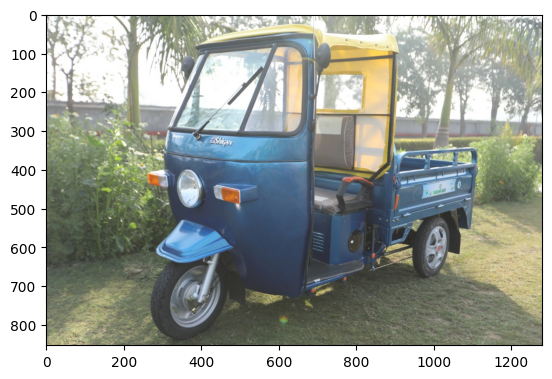

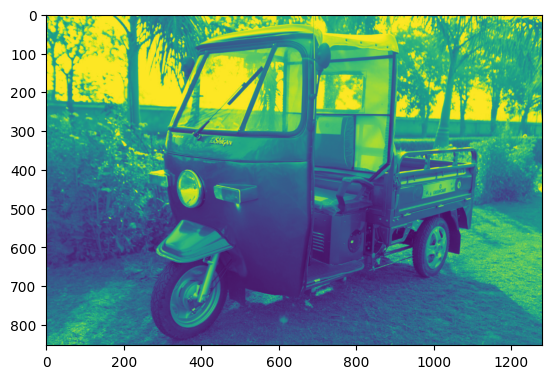

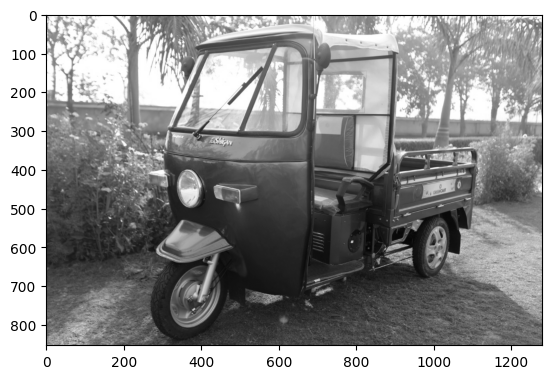

In [7]:
img = cv2.imread(path)
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.show()
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)
plt.show()
plt.imshow(gray_image, cmap='gray')
plt.show()

In [8]:
IMAGE_INPUT_SIZE = 200
dataset_dir = r"C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data"

## Folder Read

In [9]:
for folder_name in os.listdir(dataset_dir):
    print(folder_name)
    

Auto Rickshaws
Bikes
Cars
Motorcycles
Planes
Ships
Trains


## Folder Path

In [10]:
for folder_name in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder_name)
    print(folder_path)

C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Auto Rickshaws
C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Bikes
C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Cars
C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Motorcycles
C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Planes
C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Ships
C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Training Data\Trains


## File Name

In [11]:
# for folder_name in os.listdir(dataset_dir):
#     folder_path = os.path.join(dataset_dir, folder_name)
#     for file_name in os.listdir(folder_path):
#         print(file_name)

## Full Function

In [12]:
def read_dataset(dataset_dir, image_size, encoder, is_fit_transform = False):
    X=[]
    Y=[]
    for folder_name in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir,folder_name)
        for file_name in os.listdir(folder_path):
            file_path  = os.path.join(folder_path,file_name)
            img = cv2.imread(file_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE))
            img = img.reshape((IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE, 1))
            X.append(img)
            Y.append(folder_name)
    x = np.array(X)
    if is_fit_transform:
        y = encoder.fit_transform(Y)
    else:
        y = encoder.transform(Y)
    return x,y 

## Encoder

In [13]:
encoder = LabelEncoder()
x,y = read_dataset(dataset_dir, IMAGE_INPUT_SIZE, encoder, is_fit_transform = True)

## Split

In [14]:
x_train,x_val,y_train,y_val = train_test_split(x, y, test_size=0.2, random_state=42)

print(x.shape)
print(y.shape)

print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

(5415, 200, 200, 1)
(5415,)
(4332, 200, 200, 1)
(4332,)
(1083, 200, 200, 1)
(1083,)


In [15]:
print(len(folder_name))

6


## Data Augmentation

In [16]:
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# traingenerator = datagen.flow(x_train, y_train, batch_size=30)

## Model

In [17]:
model = keras.Sequential([
    Input(shape=(IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE, 1)),
    
    Conv2D(filters=32, kernel_size=3, strides=1, padding='valid', activation='relu'),   
    MaxPool2D(),

    Conv2D(filters=64, kernel_size=3, padding='valid', activation='relu'),  
    MaxPool2D(),                                                           

    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'), 
    MaxPool2D(),   

    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'), 
    MaxPool2D(), 
    
    Flatten(),
    
    Dense(150, activation='relu', kernel_regularizer=L1(l1=0.005)),
    Dropout(0.2),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 150)                 │       5,529,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             707 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,933,397 (22.63 MB)

 Trainable params: 5,933,397 (22.63 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
o = Adam(learning_rate= 0.001)
model.compile(optimizer=o,loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
History = model.fit(
    x_train,
    y_train,
    epochs=1,
    batch_size=25,
    validation_data = (x_val, y_val),
    callbacks=[
        EarlyStopping(monitor= 'val_accuracy', patience=5, verbose=1, restore_best_weights=True)
    ]
)

174/174 ━━━━━━━━━━━━━━━━━━━━ 69s 396ms/step - accuracy: 0.6006 - loss: 4.6669 - val_accuracy: 0.6528 - val_loss: 4.4604
Restoring model weights from the end of the best epoch: 1.


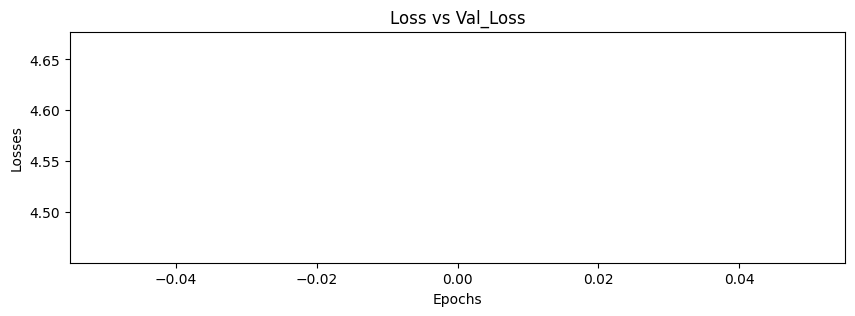

In [22]:
figsize = plt.figure(figsize=(10,3))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title("Loss vs Val_Loss")
plt.ylabel("Losses")
plt.xlabel("Epochs")
plt.show()

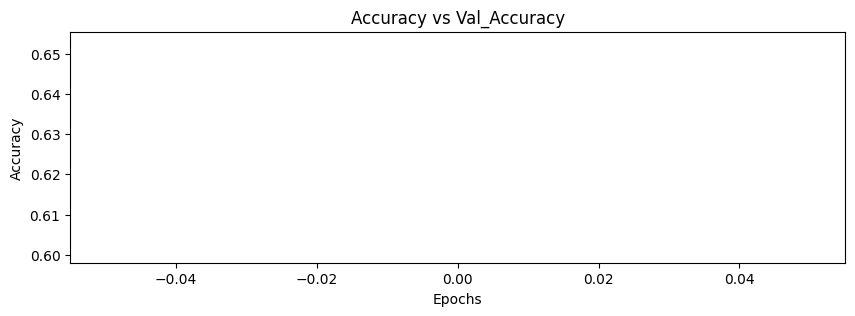

In [23]:
figsize = plt.figure(figsize=(10,3))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title("Accuracy vs Val_Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

## Saved Model

In [24]:
class ModelWrapper():
    def __init__(self, model, encoder, IMAGE_INPUT_SIZE):
        self.model = model
        self.encoder = encoder
        self.IMAGE_INPUT_SIZE = IMAGE_INPUT_SIZE
        
    def read_dataset(self, dataset_dir):
        X=[]
        Y=[]
        for folder_name in os.listdir(dataset_dir):
            folder_path = os.path.join(dataset_dir,folder_name)
            for file_name in os.listdir(folder_path):
                file_path  = os.path.join(folder_path,file_name)
                img = cv2.imread(file_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = cv2.resize(img, (self.IMAGE_INPUT_SIZE, self.IMAGE_INPUT_SIZE))
                img = img.reshape((self.IMAGE_INPUT_SIZE, self.IMAGE_INPUT_SIZE, 1))
                X.append(img)
                Y.append(folder_name)
        x = np.array(X)
        y = self.encoder.transform(Y)
        return x,y
    
    def predicto(self, dataset_dir):
        x,y = self.read_dataset(dataset_dir)
        y_pred = self.model.predict(x)
        #y_pred_binary = np.where(y_pred_score >= 0.5, 1, 0)
        y_pred= np.argmax(y_pred, axis=1)
        return y, y_pred
    
    def evaluateo(self, dataset_dir):
        x,y = self.read_dataset(dataset_dir)
        return self.model.evaluate(x, y)

VehicleModel = ModelWrapper(model, encoder, IMAGE_INPUT_SIZE)

### Model for Full directory

In [25]:
joblib.dump(VehicleModel, "VehicleModel.pkl")

['VehicleModel.pkl']

In [26]:
savedmodel = joblib.load('VehicleModel.pkl')

In [27]:
#----------------------------------------------------------------------------------------------------------------------#

### Model for Single Image

In [28]:
#Function
class ModelWrapper():
    def __init__(self, model, encoder, IMAGE_INPUT_SIZE):
        self.model = model
        self.encoder = encoder
        self.IMAGE_INPUT_SIZE = IMAGE_INPUT_SIZE
        
    def single_img_read(path):
        IMAGE_INPUT_SIZE=200
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img,(IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE))
        plt.imshow(img)
        plt.show()
        img = img.reshape(1, IMAGE_INPUT_SIZE, IMAGE_INPUT_SIZE, 1)
        z = savedModeForSingleIMG.predict(img)
        index = np.argmax(z)
        print("Predicted accuracy:", z[0][index])
        predicted_label = encoder.inverse_transform([index])
        print("Predicted class:", predicted_label)
SingleImgModel = ModelWrapper(model, encoder, IMAGE_INPUT_SIZE)

In [29]:
joblib.dump(SingleImgModel, "VehicleModelForSingleIMG.pkl")

['VehicleModelForSingleIMG.pkl']

In [30]:
savedModeForSingleIMG = joblib.load('VehicleModelForSingleIMG.pkl')

## Prediction with Testing Data

In [31]:
testing_dir = r"C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Testing Data"
y_test, y_pred = savedmodel.predicto(testing_dir)
savedmodel.evaluateo(testing_dir)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step - accuracy: 0.6571 - loss: 4.4936


[4.4935712814331055, 0.6571428775787354]

In [32]:
print(y_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
[2 0 3 0 4 0 0 0 2 2 4 0 0 0 0 0 0 0 0 0 0 6 0 0 0 4 1 0 1 1 1 1 1 1 3 1 1
 0 0 1 4 0 0 5 1 4 4 1 1 1 2 0 2 2 0 0 2 2 2 2 2 2 2 2 0 2 3 2 2 2 3 2 0 3
 2 3 3 3 3 3 5 4 4 2 3 2 2 3 3 4 3 3 2 3 3 2 3 3 3 3 4 4 4 4 3 5 4 4 4 5 4
 4 4 4 4 4 0 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 4 3 5 5 0 5 5 5 5
 5 5 2 6 0 2 6 5 6 5 6 0 6 6 5 5 2 5 6 0 5 0 4 6 0 0 6]


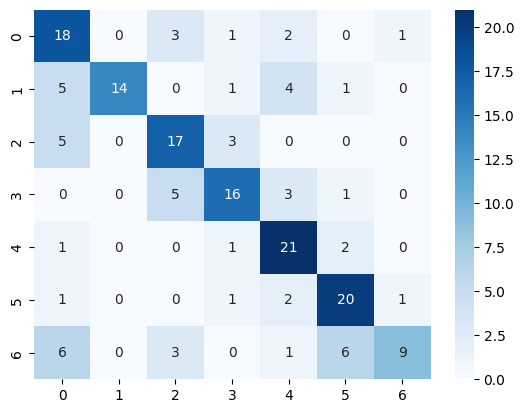

In [33]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

## Prediction with Single Image

In [36]:
#Image 1
url1 = r"C:\Users\ARSAMANT\OneDrive - Capgemini\Pictures\Screenshots\Plane.jpg"
img = savedModeForSingleIMG.single_img_read(url1)

TypeError: ModelWrapper.single_img_read() takes 1 positional argument but 2 were given

In [38]:
#Image 2
ur2 = r"C:\Users\ARSAMANT\OneDrive - Capgemini\Pictures\Screenshots\Car.jpg"
img = savedModeForSingleIMG.single_img_read(url)

TypeError: ModelWrapper.single_img_read() takes 1 positional argument but 2 were given

### Checking the model work properly or not

In [ ]:
# Run The Libraries First
savedmodel = joblib.load('VehicleModel.pkl')
path = r"C:\Arunava Docs\Pyspark Resourse\ML\CNN\Vehicles\Testing Data"
savedmodel.evaluateo(testing_dir)

In [ ]:
# Run The Libraries First
savedModeForSingleIMG = joblib.load('VehicleModelForSingleIMG.pkl')
url = r"C:\Users\ARSAMANT\OneDrive - Capgemini\Pictures\Screenshots\Bike.jpg"
img = single_img_read(url, encoder)

In [ ]:
##############################################################################################################################